In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('data.csv', sep=';')
X = dataset.iloc[:, [6, 7]].values
y = dataset.iloc[:, -1].values

In [4]:
X

array([[       1742, 59273109911],
       [       1149, 19495860538],
       [        145, 13676572874],
       ...,
       [          0,           0],
       [          0,           0],
       [          0,           0]])

Memisahkan dataset menjadi set Pelatihan dan set Tes

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
X_train

array([[         77,     9076626],
       [          0,           0],
       [        219,    76622193],
       [          0,           0],
       [          0,           0],
       [          1,       21000],
       [          9,    52618103],
       [          6,     1024000],
       [          2,       88000],
       [          0,           0],
       [        384,   455672355],
       [         16,      410257],
       [          4,        1690],
       [          2,       59000],
       [          5,       60608],
       [        382,    28548343],
       [        105,     3608339],
       [          0,           0],
       [       1742, 59273109911],
       [          3,       48000],
       [        148,   124159888],
       [          8,        3200],
       [        204,    71117334],
       [          1,       43750],
       [         43,    28791934],
       [          1,       47266],
       [          0,           0],
       [          8,       86000],
       [          2,

Penskalaan Fitur

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
X_train

array([[-2.37971718e-02, -1.06675269e-01],
       [-1.80687197e-01, -1.09757320e-01],
       [ 2.65532485e-01, -8.37395564e-02],
       [-1.80687197e-01, -1.09757320e-01],
       [-1.80687197e-01, -1.09757320e-01],
       [-1.78649664e-01, -1.09750189e-01],
       [-1.62349402e-01, -9.18903638e-02],
       [-1.68462000e-01, -1.09409611e-01],
       [-1.76612131e-01, -1.09727439e-01],
       [-1.80687197e-01, -1.09757320e-01],
       [ 6.01725397e-01,  4.49703776e-02],
       [-1.48086672e-01, -1.09618013e-01],
       [-1.72537066e-01, -1.09756746e-01],
       [-1.76612131e-01, -1.09737286e-01],
       [-1.70499533e-01, -1.09736740e-01],
       [ 5.97650331e-01, -1.00063470e-01],
       [ 3.32537465e-02, -1.08532075e-01],
       [-1.80687197e-01, -1.09757320e-01],
       [ 3.36869493e+00,  2.00169669e+01],
       [-1.74574599e-01, -1.09741021e-01],
       [ 1.20867657e-01, -6.75976992e-02],
       [-1.64386935e-01, -1.09756233e-01],
       [ 2.34969493e-01, -8.56087814e-02],
       [-1.

Melatih model K-NN pada set Pelatihan

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', p=1)

Memprediksi hasil Test set

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
print(y_pred)
print(y_test)

[5 5 5 5 5 4 5 5 5 5 5 4 5 5 5 5 5 5 0 3 5 0 5 5 4 5 5 5 5 5 5 3 3 0 4 5 4
 5 5 3 5 5 5 3 3 5 0 5 0 5 5 5 4 5 5 2 5 4 5 5 5 5 1 5 4 5 5 4 3 5 1 5 5 2
 4 4 5 5 4 5 5 5 0 5 5 3 5 5 5 3 5 4 3 5 5 5 5 1 5 5 5 0 2 5 4 5 3 5 3 5 5
 4 3 5 4 4 0 4 5 0 5 5 5 5 3 5 5 3 1 4 5 5 5 0 0 5 0 4 0 5 5 4 5 5 0 5 0 0
 5 5 5 5 4 0 5 4 0 5]
[5 5 5 5 5 4 5 5 5 5 5 4 5 5 5 5 5 5 0 3 5 0 5 5 4 5 5 5 5 5 5 3 3 5 4 5 5
 4 5 2 5 5 5 3 3 5 0 5 0 5 5 5 5 5 5 1 5 4 5 0 5 5 1 5 3 5 5 4 3 5 1 5 5 2
 4 4 5 5 4 5 5 5 0 5 5 3 5 5 5 3 5 5 3 5 5 5 5 1 5 5 5 0 1 5 4 0 3 5 3 5 5
 4 3 5 3 4 0 3 5 0 5 5 4 5 1 5 5 3 1 5 4 5 5 0 5 5 5 3 0 5 4 4 5 5 0 5 0 0
 5 5 5 5 4 0 5 4 0 5]


Membuat Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15  0  0  0  0  2]
 [ 0  4  2  1  0  0]
 [ 0  0  1  1  0  0]
 [ 0  0  0 13  4  0]
 [ 0  0  0  0 15  4]
 [ 3  0  0  0  4 89]]


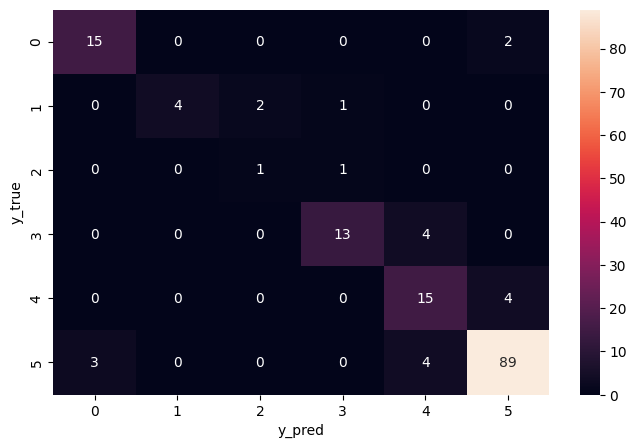

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [14]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       1.00      0.57      0.73         7
           2       0.33      0.50      0.40         2
           3       0.87      0.76      0.81        17
           4       0.65      0.79      0.71        19
           5       0.94      0.93      0.93        96

    accuracy                           0.87       158
   macro avg       0.77      0.74      0.74       158
weighted avg       0.88      0.87      0.87       158



Memvisualisasikan hasil Training Set

<ipython-input-16-cb1cb3d1d1bf>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


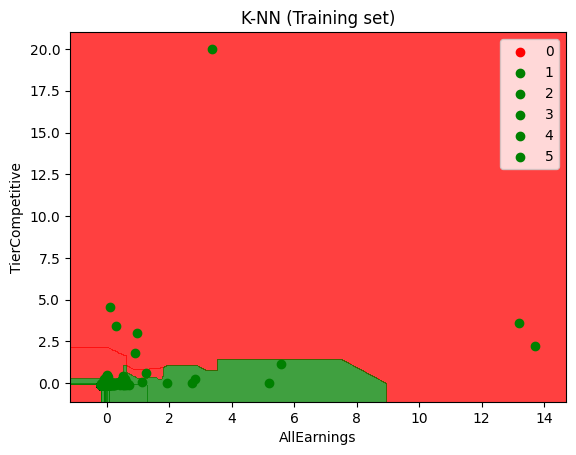

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('AllEarnings')
plt.ylabel('TierCompetitive')
plt.legend()
plt.show()

Memvisualisasikan hasil Test Set

<ipython-input-17-35dd8464f8a0>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


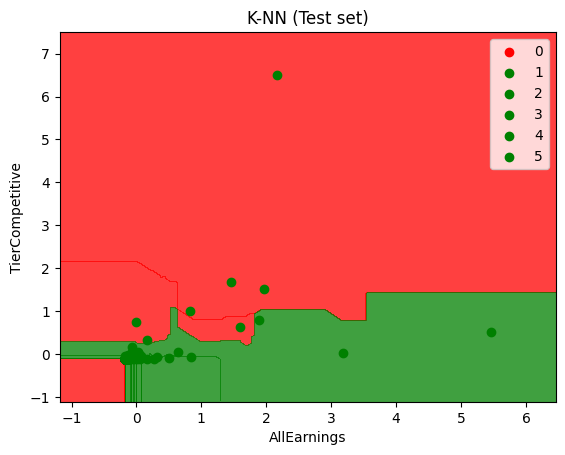

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('AllEarnings')
plt.ylabel('TierCompetitive')
plt.legend()
plt.show()